In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1'

Data Preparation and Load Data

In [3]:
weight = 0.6
bias = 2

X = torch.arange(start=0, end=100, step=0.001).unsqueeze(dim=1)
Y = weight * X + bias

print("Shape of X: ", X.shape,"Shape of Y: ",  Y.shape, )

for i in range(len(X[:10])):
    print(X[i], Y[i])

Shape of X:  torch.Size([100000, 1]) Shape of Y:  torch.Size([100000, 1])
tensor([0.]) tensor([2.])
tensor([0.0010]) tensor([2.0006])
tensor([0.0020]) tensor([2.0012])
tensor([0.0030]) tensor([2.0018])
tensor([0.0040]) tensor([2.0024])
tensor([0.0050]) tensor([2.0030])
tensor([0.0060]) tensor([2.0036])
tensor([0.0070]) tensor([2.0042])
tensor([0.0080]) tensor([2.0048])
tensor([0.0090]) tensor([2.0054])


Splitting Train and Test Data

In [4]:
train_len = int(0.85 * len(X))
print("Training Size: ", train_len)

train_X, train_y = X[:train_len], Y[:train_len]
test_X, test_Y = X[train_len:], Y[train_len:]

train_X.shape, test_X.shape

Training Size:  85000


(torch.Size([85000, 1]), torch.Size([15000, 1]))

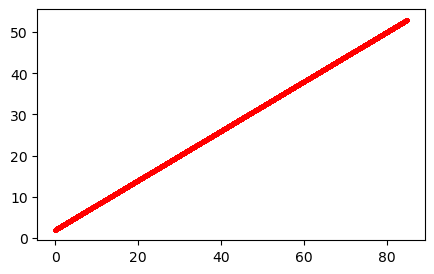

In [5]:
def plotData(X, Y, c = 'b'):
    plt.figure(figsize=(5, 3))
    plt.scatter(X, Y, s = 3, c = c )
    plt.show()

plotData(train_X, train_y, 'r')

Building the Model

In [6]:
class LinearRegression(nn.Module):
    def __init__(self, ):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias


In [7]:
torch.manual_seed(42)

model_test = LinearRegression()

print("Parameters: ", list(model_test.parameters()))
print("State Dict: ", model_test.state_dict())


Parameters:  [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
State Dict:  OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [8]:
# predicting value without training the model

with torch.inference_mode():
    y_pred = model_test(test_X)

# We can do the same this using
# with torch.no_grad():
#     y_pred = model_test(test_X)

y_pred[:10], test_Y[:10]

(tensor([[28.7475],
         [28.7478],
         [28.7482],
         [28.7485],
         [28.7488],
         [28.7492],
         [28.7495],
         [28.7498],
         [28.7502],
         [28.7505]]),
 tensor([[53.0000],
         [53.0006],
         [53.0012],
         [53.0018],
         [53.0024],
         [53.0030],
         [53.0036],
         [53.0042],
         [53.0048],
         [53.0054]]))

Training the Model

In [ ]:
torch.manual_seed(42)
lossFn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_test.parameters(), lr=0.01)

epochs = 1000

for each_epoch in range(epochs):
    model_test.train()

    y_pred = model_test(train_X)

    loss = lossFn(y_pred, train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_test.eval()
    with torch.inference_mode():
        y_pred = model_test(test_X)
        test_loss = lossFn(y_pred, test_Y)
    if each_epoch % 20 == 0:
        print(f" Epoch: {each_epoch}, Train loss is {loss.item()} ans test loss is {test_loss.item()}")
        print([model_test.state_dict()])


 Epoch: 0, Train loss is 13.061718940734863 ans test loss is 13.094616889953613
[OrderedDict([('weights', tensor([0.7617])), ('bias', tensor([0.1388]))])]
 Epoch: 20, Train loss is 9.004914283752441 ans test loss is 21.899574279785156
[OrderedDict([('weights', tensor([0.8566])), ('bias', tensor([0.1597]))])]
 Epoch: 40, Train loss is 6.842517852783203 ans test loss is 26.587886810302734
[OrderedDict([('weights', tensor([0.9072])), ('bias', tensor([0.1751]))])]
 Epoch: 60, Train loss is 5.253997325897217 ans test loss is 30.029743194580078
[OrderedDict([('weights', tensor([0.9442])), ('bias', tensor([0.1883]))])]
 Epoch: 80, Train loss is 3.9681782722473145 ans test loss is 32.814334869384766
[OrderedDict([('weights', tensor([0.9742])), ('bias', tensor([0.2002]))])]
 Epoch: 100, Train loss is 2.8747856616973877 ans test loss is 35.18120574951172
[OrderedDict([('weights', tensor([0.9997])), ('bias', tensor([0.2112]))])]
 Epoch: 120, Train loss is 1.9165793657302856 ans test loss is 37.25

In [10]:
print([model_test.state_dict()])
# with torch.no_grad():
#     y_pred = model_test(test_Y)

# y_pred[:10], test_Y[:10]

[OrderedDict([('weights', tensor([0.6148])), ('bias', tensor([0.6013]))])]


Saving the Model

torch.save() 

torch.load() 

torch.nn.Module.load_state_dict()

In [11]:
from pathlib import Path
modelPath = Path("model.pth")
torch.save(model_test.state_dict(), f=modelPath)

In [12]:
modelLoaded = LinearRegression()
modelLoaded.load_state_dict(torch.load(modelPath))

/var/folders/y8/q2s37ndx6tg3lpzp3vp8xk_r0000gn/T/ipykernel_12150/1116700186.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  modelLoaded.load_state_dict(torch.load(modelP

<All keys matched successfully>

In [13]:
modelLoaded.eval()
with torch.inference_mode():
    ypred = modelLoaded(test_X)

ypred

tensor([[52.8610],
        [52.8616],
        [52.8622],
        ...,
        [62.0815],
        [62.0821],
        [62.0827]])

In [22]:
torch.manual_seed(42)
class LinearRegressionModeV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear(x)
    
modelV2 = LinearRegressionModeV2()
lossFn = nn.L1Loss()
optimizer = torch.optim.SGD(params=modelV2.parameters(), lr=0.01)
epochs = 200

for each_epoch in range(epochs):
    modelV2.train()
    y_pred = modelV2(train_X)

    loss = lossFn(y_pred, train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    modelV2.eval()
    with torch.inference_mode():
        test_pred = modelV2(test_X)
        losstest = lossFn(test_pred, test_Y)
    
    print(f"Train Loss is {loss} and test loss is {losstest}, at epoch {each_epoch}")





Train Loss is 5.920702934265137 and test loss is 24.720218658447266, at epoch 0
Train Loss is 11.994796752929688 and test loss is 14.601607322692871, at epoch 1
Train Loss is 6.171483039855957 and test loss is 24.207609176635742, at epoch 2
Train Loss is 11.758404731750488 and test loss is 15.114217758178711, at epoch 3
Train Loss is 6.404669284820557 and test loss is 23.727916717529297, at epoch 4
Train Loss is 11.537161827087402 and test loss is 15.593913078308105, at epoch 5
Train Loss is 6.623079299926758 and test loss is 23.276409149169922, at epoch 6
Train Loss is 11.328897476196289 and test loss is 16.0454158782959, at epoch 7
Train Loss is 6.828814506530762 and test loss is 22.849233627319336, at epoch 8
Train Loss is 11.131834983825684 and test loss is 16.47258949279785, at epoch 9
Train Loss is 7.023600101470947 and test loss is 22.443466186523438, at epoch 10
Train Loss is 10.94462776184082 and test loss is 16.87835693359375, at epoch 11
Train Loss is 7.208737373352051 and t

In [23]:
modelV2.state_dict()

OrderedDict([('linear.weight', tensor([[0.9656]])),
             ('linear.bias', tensor([0.9245]))])